In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_parquet('data_bronze/data_filtred.parquet')
df

,DATA_ACAO,TOTAL_POSTAGEM
0,2022-01-26,3689
1,2022-01-24,3529
2,2022-01-27,3443
3,2022-01-18,3337
4,2022-01-13,3294
...,...,...
1496,2022-08-13,404
1497,2022-08-21,309
1498,2022-08-06,303
1499,2022-08-28,184


In [4]:
df = df.sort_values(by='DATA_ACAO', ascending=True)
df

,DATA_ACAO,TOTAL_POSTAGEM
633,2020-03-01,48
612,2020-03-02,1713
606,2020-03-03,1906
613,2020-03-04,1644
619,2020-03-05,1534
...,...,...
583,2024-04-26,3920
597,2024-04-27,442
602,2024-04-28,169
578,2024-04-29,4589


In [5]:
df.set_index('DATA_ACAO', inplace=True)
df = df.resample('W').sum()
df

,TOTAL_POSTAGEM
DATA_ACAO,
2020-03-01,48
2020-03-08,10572
2020-03-15,8424
2020-03-22,12411
2020-03-29,8806
...,...
2024-04-07,18132
2024-04-14,21705
2024-04-21,21129


In [6]:
series_numpy = df['TOTAL_POSTAGEM'].to_numpy()
df['TOTAL_POSTAGEM'].dtypes

dtype('int64')

<Axes: xlabel='DATA_ACAO'>

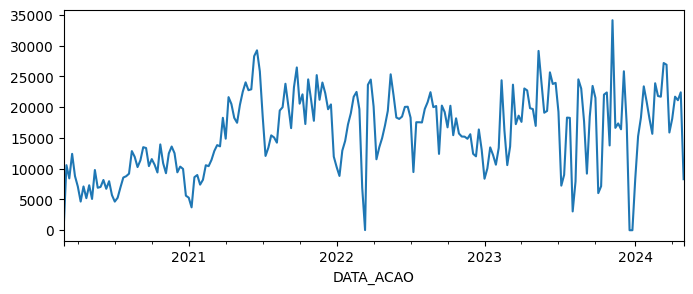

In [7]:
df['TOTAL_POSTAGEM'].plot(figsize=(8,3))

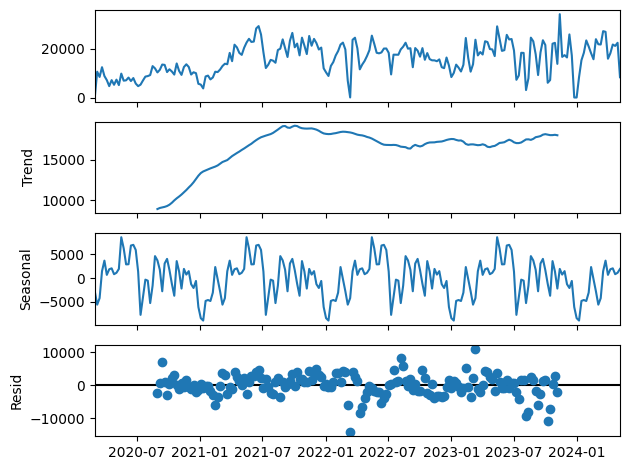

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, model='additive',period=52)
decomposition.plot()
plt.show()

In [9]:
from statsmodels.tsa.arima.model import ARIMA

In [11]:
# Divisão de treino e teste
train = df[:-12]  
test = df[-12:]

In [12]:
# Modelagem ARIMA
model = ARIMA(train, order=(5,1,0))
fit = model.fit()

In [13]:
# Previsão
forecast = fit.forecast(steps=12)[0]
df_forecast = pd.DataFrame(data={"Forecast": forecast}, index=test.index)

/tmp/ipykernel_1438733/2225181352.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = fit.forecast(steps=12)[0]


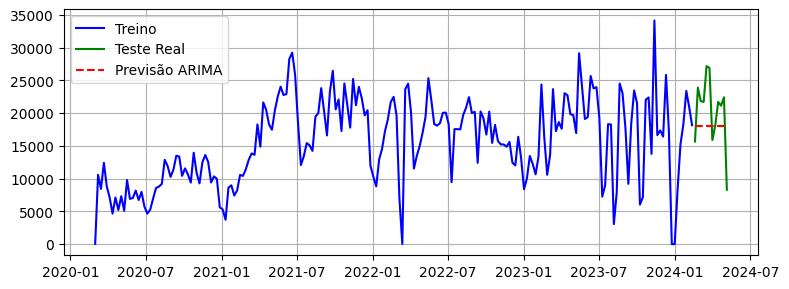

In [16]:
# Visualização
plt.figure(figsize=(8, 3))
plt.plot(train, label="Treino", color='blue')
plt.plot(test, label="Teste Real", color='green')
plt.plot(df_forecast, label="Previsão ARIMA", linestyle="--", color='red')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
train, test, df_forecast

(            TOTAL_POSTAGEM
 DATA_ACAO                 
 2020-03-01              48
 2020-03-08           10572
 2020-03-15            8424
 2020-03-22           12411
 2020-03-29            8806
 ...                    ...
 2024-01-14           15268
 2024-01-21           18310
 2024-01-28           23384
 2024-02-04           20908
 2024-02-11           18140
 
 [207 rows x 1 columns],
             TOTAL_POSTAGEM
 DATA_ACAO                 
 2024-02-18           15670
 2024-02-25           23885
 2024-03-03           21814
 2024-03-10           21703
 2024-03-17           27176
 2024-03-24           26899
 2024-03-31           15883
 2024-04-07           18132
 2024-04-14           21705
 2024-04-21           21129
 2024-04-28           22415
 2024-05-05            8295,
                 Forecast
 DATA_ACAO               
 2024-02-18  17993.364576
 2024-02-25  17993.364576
 2024-03-03  17993.364576
 2024-03-10  17993.364576
 2024-03-17  17993.364576
 2024-03-24  17993.364576
 2024-03

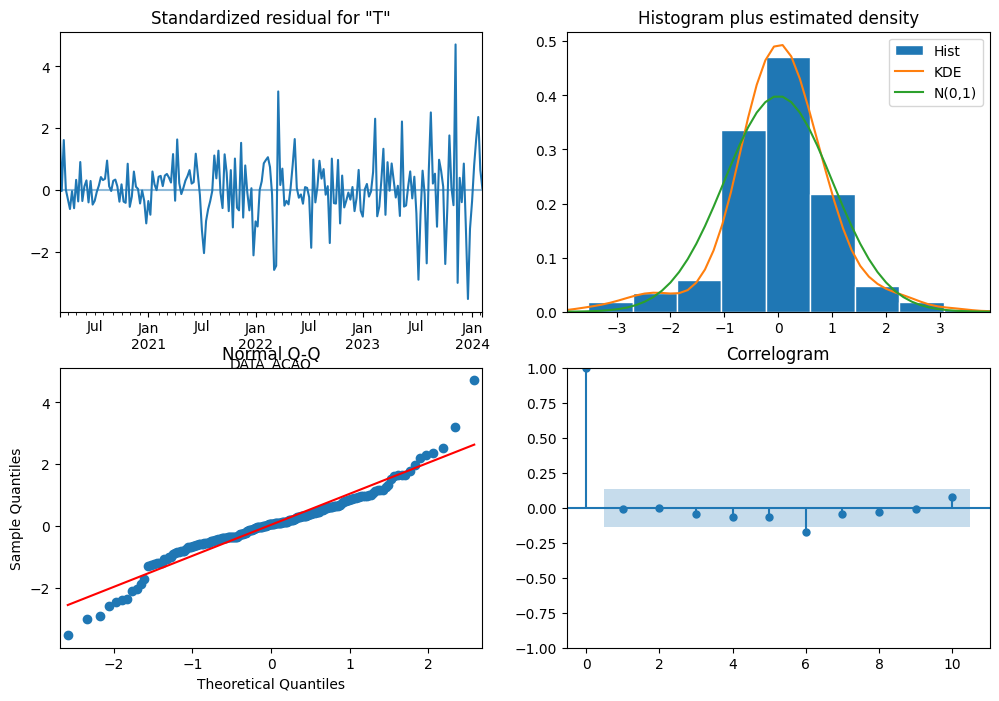

In [17]:
# Diagnóstico
fit.plot_diagnostics(figsize=(12, 8))
plt.show()